# **Image Classification Using CNN with The CIFAR-10 Dataset**



# Step 1 : Importing The necessary Libraries


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Step 2 : Loading and pre-processing of the CNN on CIFAR-10 Dataset

In [ ]:
(train_images, train_labels),(test_images, test_labels) =datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


# Step 3 : Normalissing pixel values to be between 0 and 1

In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0

# Step 4 : Definig the class names for CIFAR-10 images

In [ ]:
class_name =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Step 5: Visulaising a few training images from the  CIFAR-10 *dataset*

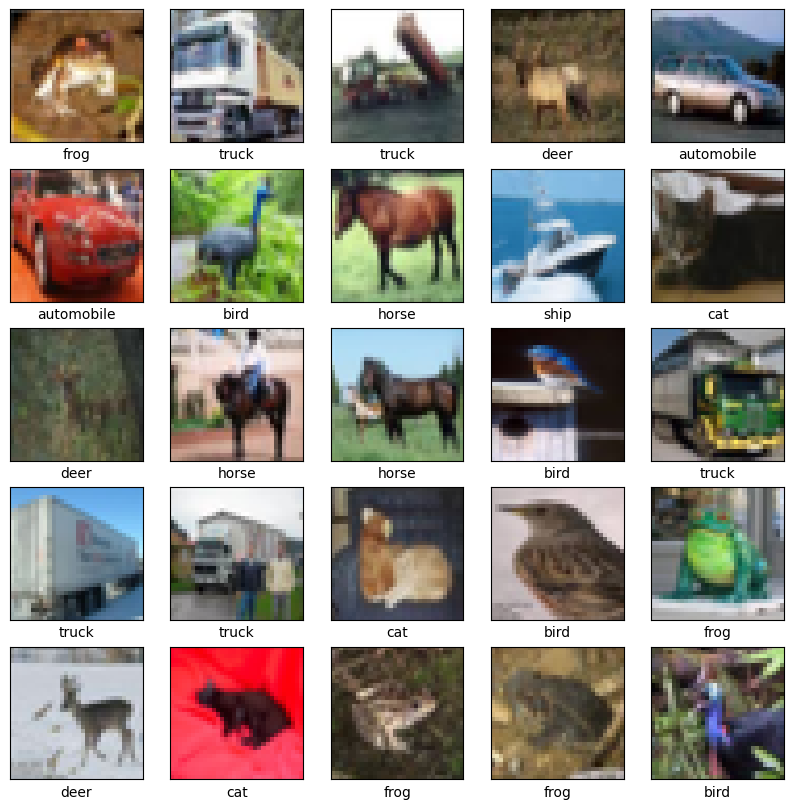

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i][0]])
plt.show()

# Step 6:Building the CNN model (customised model)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Step 7: Printing the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

# Step 8: Compiling the model CNN

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Step 9: Training the CNN model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 1.5213 - accuracy: 0.4458 - val_loss: 1.2129 - val_accuracy: 0.5652
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1585 - accuracy: 0.5899 - val_loss: 1.1080 - val_accuracy: 0.6044
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0085 - accuracy: 0.6475 - val_loss: 1.0369 - val_accuracy: 0.6362
Epoch 4/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.9084 - accuracy: 0.6818 - val_loss: 0.9302 - val_accuracy: 0.6797
Epoch 5/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8388 - accuracy: 0.7060 - val_loss: 0.9069 - val_accuracy: 0.6911
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7753 - accuracy: 0.7311 - val_loss: 0.9004 - val_accuracy: 0.6854
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7290 - accuracy: 0.7456 - val_loss: 0.8718 -

# Step 10: Evaluting the performance of the CNN model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy is: {test_acc}')

313/313 - 5s - loss: 2.3093 - accuracy: 0.0989 - 5s/epoch - 15ms/step

Test accuracy is: 0.09889999777078629


# Step 11: Plotting the Training and validation accuracy and loss values

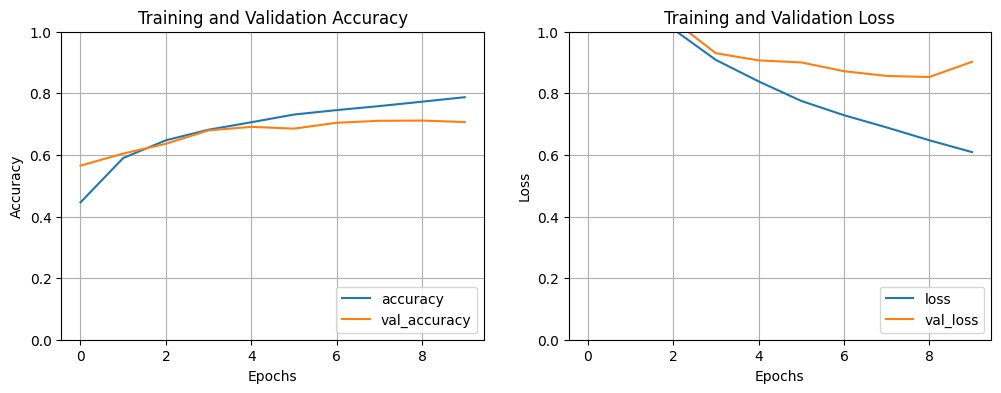

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.grid()

plt.show()

# **Image Classification Using CNN with the CIFAR-10 Dataset using basic Hyperparameter Tunning**


In [ ]:
pip install keras-tuner

# Step 1 : Importing The necessary Libraries


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras_tuner.tuners import RandomSearch
import matplotlib.pyplot as plt

# Step 2 : Loading and pre-processing of the CNN on CIFAR-10 Dataset

In [ ]:
(train_images, train_labels),(test_images, test_labels) =datasets.cifar10.load_data()
train_images=train_images/255.0
test_images=test_images/255.0

# Step 3 : Definig the class names for CIFAR-10 images

In [ ]:
class_name =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Step 4: Define a function to build the model.


In [ ]:
def build_model(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(hp.Int('conv1_units', min_value=32, max_value=128, step=16), (3,3), activation='relu', input_shape=(32,32,3)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(hp.Int('conv2_units', min_value=32, max_value=128, step=16), (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(hp.Int('conv3_units', min_value=32, max_value=128, step=16), (3,3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(hp.Int('dense_units', min_value=32, max_value=128, step=16), activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(10))
    # Choose an optimizer and learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
    model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    return model

# Step 5: Define the Tuner

In [ ]:
tuner = RandomSearch(
build_model,
objective='val_accuracy',
max_trials=10,
executions_per_trial=1,
directory='my_dir',
project_name='cifar10_tunning'
)


# Step 6: Perform the Hyperparameter search


In [ ]:
tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Trial 10 Complete [00h 15m 27s]
val_accuracy: 0.6711000204086304

Best val_accuracy So Far: 0.6937999725341797
Total elapsed time: 02h 29m 26s


# Step 7: Get the best Hyperparameters


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Step 8: Build the model with the best Hyperparameters and train it


In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 83s 52ms/step - loss: 1.5091 - accuracy: 0.4513 - val_loss: 1.2491 - val_accuracy: 0.5575
Epoch 2/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.1474 - accuracy: 0.5967 - val_loss: 1.0440 - val_accuracy: 0.6334
Epoch 3/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9826 - accuracy: 0.6555 - val_loss: 1.0015 - val_accuracy: 0.6525
Epoch 4/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.8704 - accuracy: 0.6960 - val_loss: 0.9412 - val_accuracy: 0.6750
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7887 - accuracy: 0.7232 - val_loss: 0.9034 - val_accuracy: 0.6959
Epoch 6/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7169 - accuracy: 0.7476 - val_loss: 0.9103 - val_accuracy: 0.6949
Epoch 7/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.6593 - accuracy: 0.7685 - val_loss: 0.8736 -

# Step 9: Plotting training & validation accuracy and loss values


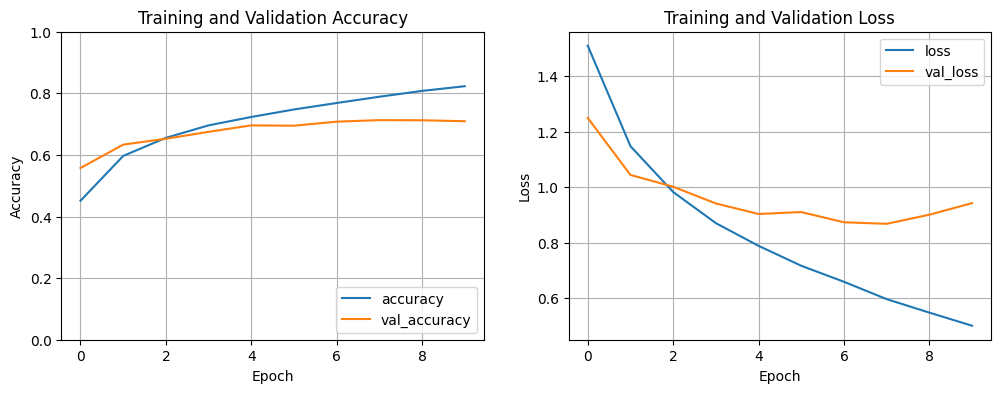

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()
